# <div style="text-align: center; background-color: #0C6A86; font-family:Times New Roman; color: white; padding: 14px; line-height: 1;border-radius:20px">EDA on House Prices Dataset</div>

# About Dataset
Descrição do dataset a respeito dos atributos

 1. Id: bla bla
 2. MSSubClass: The building class

# Notebook Objectives

#### Goal of the notebook is to:
 1. Explore every feature in the dataset;
 2. Bla Bla Bla

# Table of Contents

# Import necessary libraries

In [1]:
# Basic Libraries
import os
import git

# Data Manipulation and Calculation
import pandas as pd
import numpy as np
import scipy.stats
from scipy.stats import gaussian_kde

# Machine Learning
from sklearn.preprocessing import LabelEncoder

# set the display option to show all columns
pd.set_option('display.max_columns', None)

# Data visualization
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import ticker
import missingno as msno

# Functions

In [2]:
# Função para encontrar diretório do repositório git
def get_git_root(path) -> str:
    git_repo = git.Repo(path, search_parent_directories=True)
    git_root = git_repo.git.rev_parse("--show-toplevel")
    return git_root


def encode_categorical(df):
    le = LabelEncoder()
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = le.fit_transform(df[col])
    return df


# Data load

In [3]:
# Diretório do repositório git
git_dir = get_git_root(os.getcwd())

# Diretório dos dados
data_dir = os.path.join(git_dir, "data")

# Leitura dos arquivos de treinamento e teste
df_train = pd.read_csv(os.path.join(data_dir, "train.csv"))
test_input = pd.read_csv(os.path.join(data_dir, "test.csv"))
sample_output = pd.read_csv(os.path.join(data_dir, "sample_submission.csv"))

# merge entre dataframes
df_test = pd.merge(test_input, sample_output, how="inner", on="Id")


## Train data

In [4]:
df_train.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
print("Quantity of Attributes:", df_train.shape[1])
print("Quantity of Objects:", df_train.shape[0])


Quantity of Attributes: 81
Quantity of Objects: 1460


## Test data

In [6]:
df_test.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,169277.052498
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,187758.393989
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,183583.683570
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,179317.477511
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal,150730.079977


In [7]:
print("Quantity of Attributes:", df_test.shape[1])
print("Quantity of Objects:", df_test.shape[0])


Quantity of Attributes: 81
Quantity of Objects: 1459


# Dataframe Analysis

## Attributes

In [8]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## Missing values

The following columns have missing values:
- LotFrontage
- Alley
- MasVnrType
- MasVnrArea
- BsmtQual
- BsmtCond
- BsmtExposure
- BsmtFinType1
- BsmtFinType2
- Electrical
- FireplaceQu
- GarageType
- GarageYrBlt
- GarageFinish
- GarageQual
- GarageCond
- PoolQC
- Fence
- MiscFeature


Text(0.5, 1.0, 'Distribution of Missing Values')

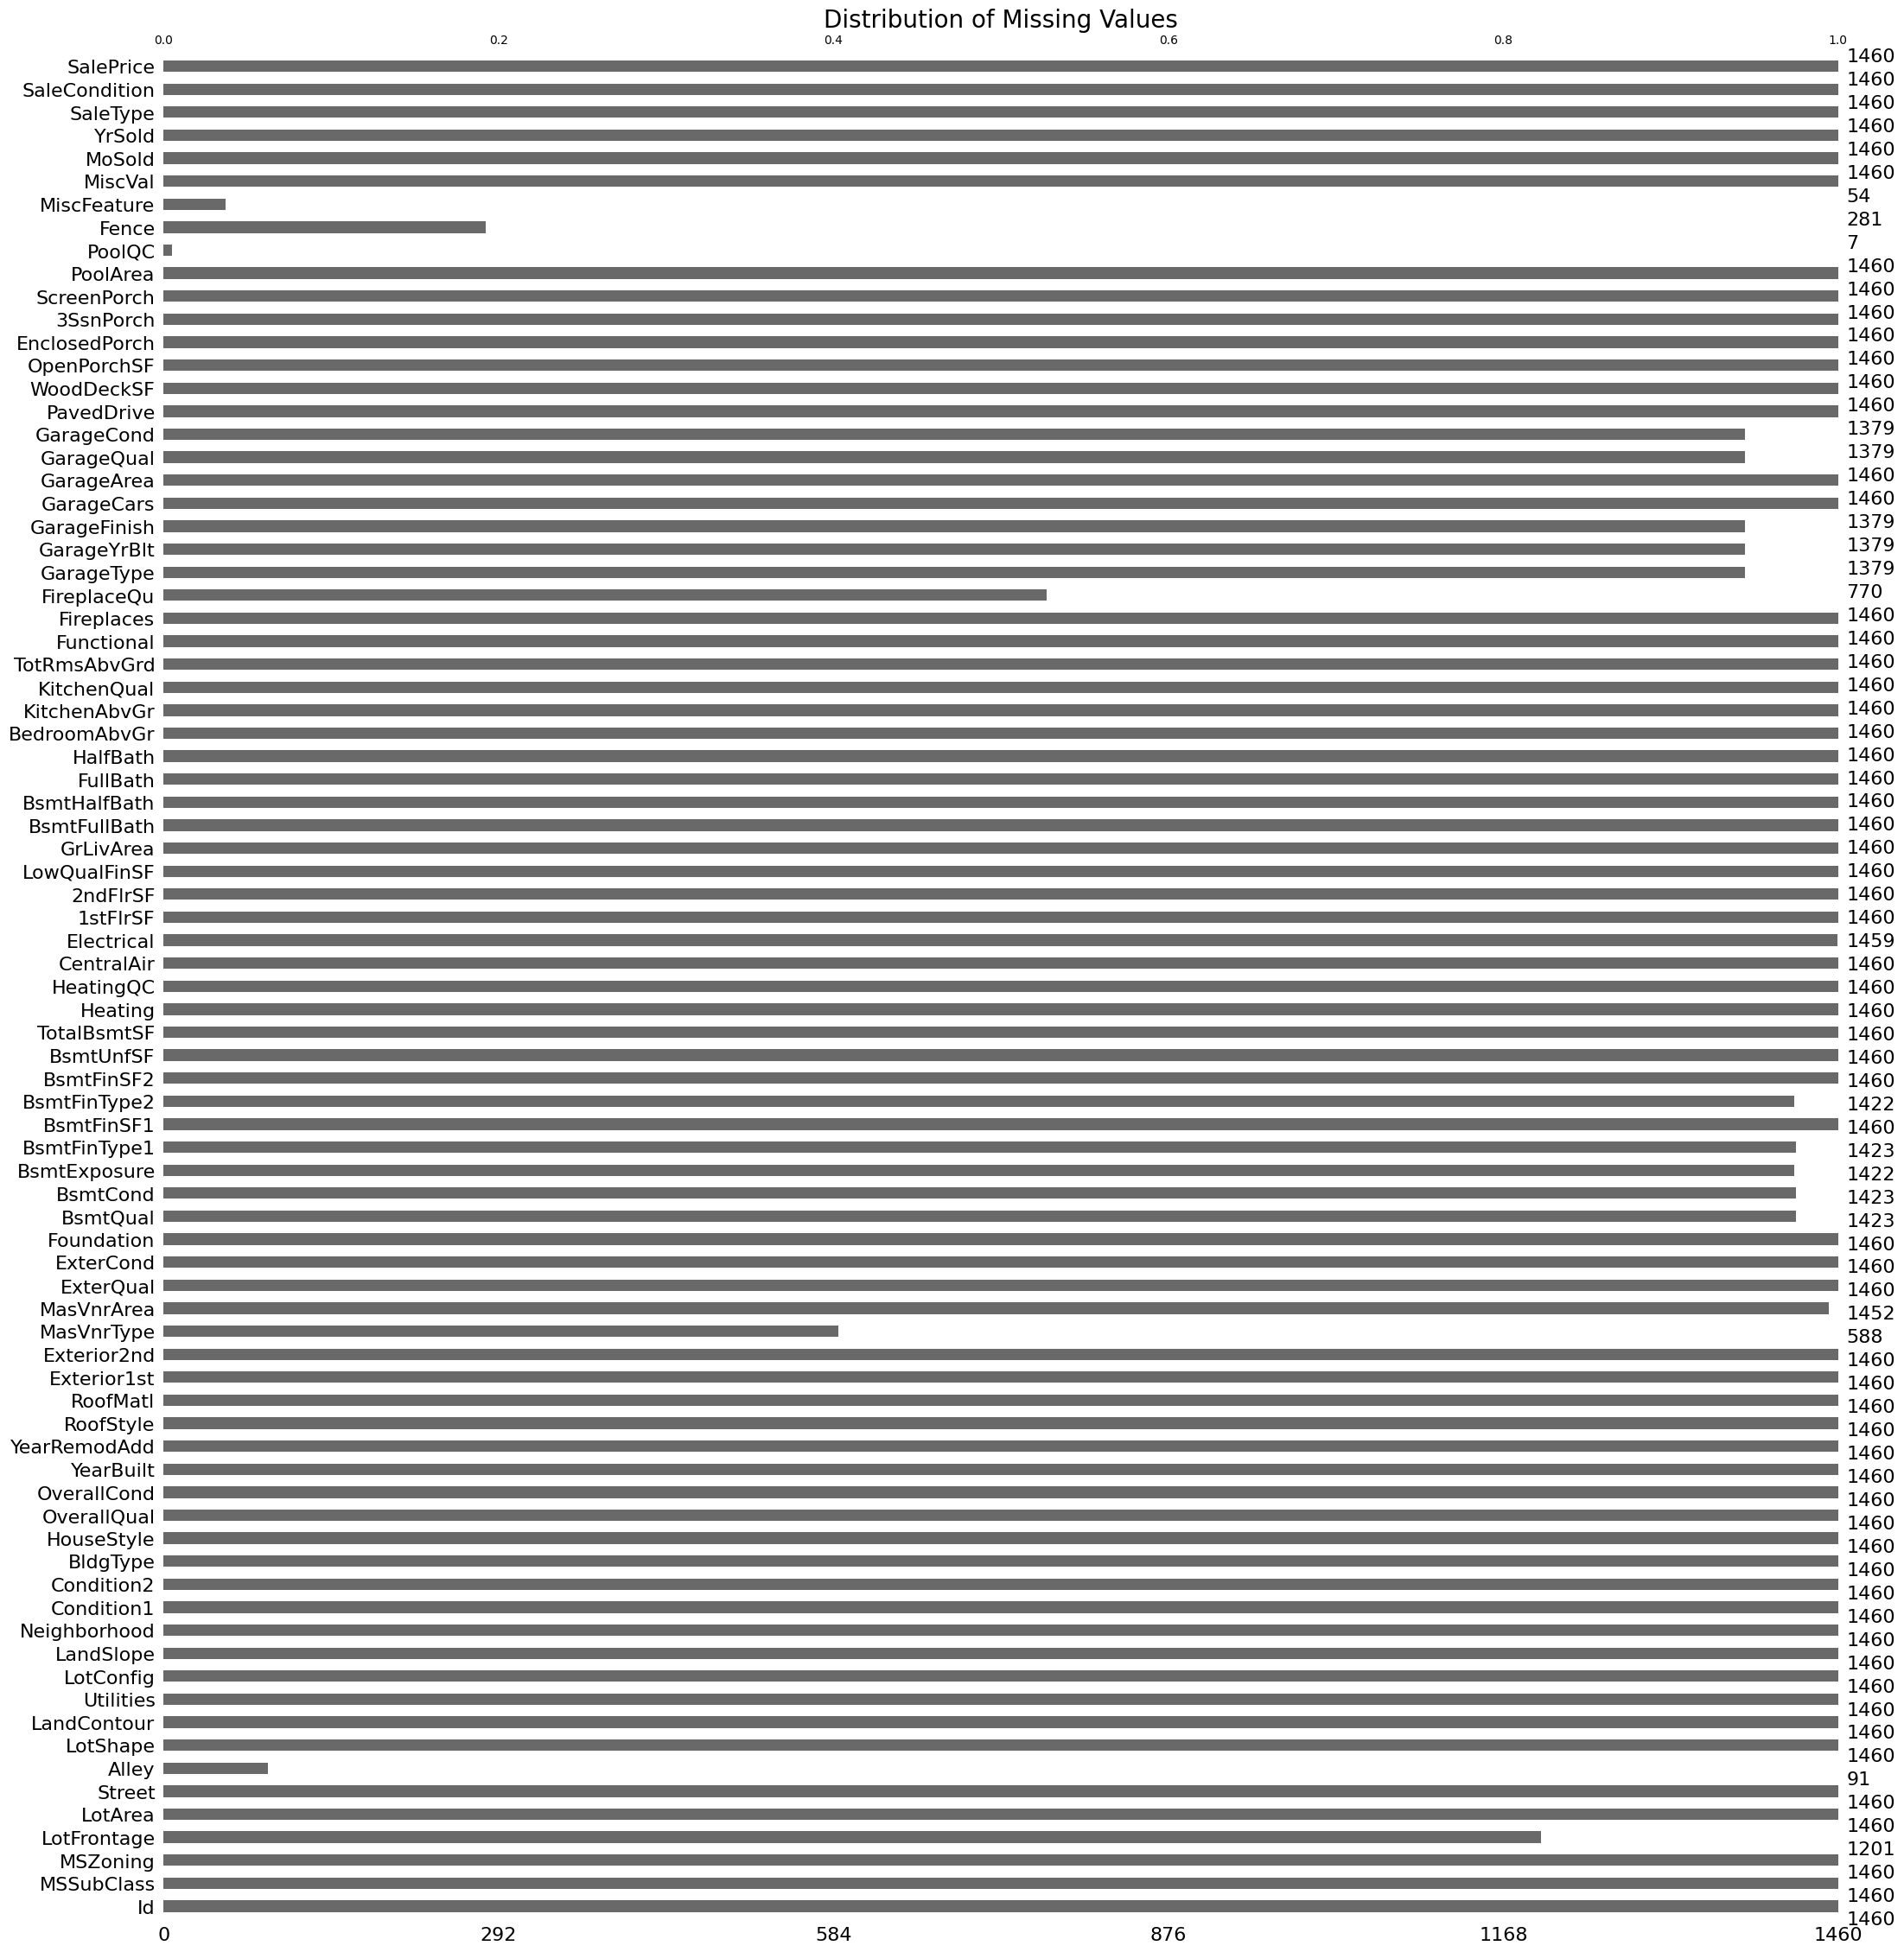

In [9]:
# check which columns have missing values
has_missing = df_train.isna().any()

# select the columns that have at least one missing value
cols_with_missing = df_train.columns[has_missing].tolist()

# print the columns with missing values
print("The following columns have missing values:")

[print(f"- {column}") for column in cols_with_missing]


msno.bar(df_train)
plt.title("Distribution of Missing Values", fontsize=20)


# Functions

In [10]:
# Donut Chart
def donut_chart(df: pd.DataFrame, categorical_attribute: str) -> go.Figure:
    df_categorical_attribute = df[categorical_attribute].value_counts()

    fig = go.Figure(
        data=[
            go.Pie(
                labels=df_categorical_attribute.index,
                values=df_categorical_attribute.values,
                marker=dict(colors=px.colors.sequential.Turbo),
            )
        ]
    )

    fig.update_traces(
        hole=0.33,
        textinfo="none",
        texttemplate="%{label} <br> %{value} (%{percent:.1%})",
    )

    return fig


# Box plot chart
def boxplot_chart(df: pd.DataFrame, numeric_attribute: str) -> go.Box:
    box = go.Box(
        y=df[numeric_attribute].values,
        boxmean=True,
        boxpoints="all",
        jitter=0.3,
        pointpos=-1.8,
        marker=dict(color="darkblue"),
        line=dict(color="black"),
        name=f"{numeric_attribute}",
        showlegend=False,
    )

    return box


def kde_values(
    x,
    min,
    max,
) -> tuple:
    # Calculando a densidade de probabilidade com gaussian_kde
    kde = gaussian_kde(x)

    # Avaliando a função KDE em um conjunto de pontos x
    x_vals = np.linspace(min, max, 100)
    y_vals = kde.evaluate(x_vals)

    return x_vals, y_vals


# Univariate Analysis

## Categorical Columns

 - MSSubClass
 - MSZoning
 - Street
 - Alley
 - LotShape
 - LandContour
 - Utilities
 - LotConfig
 - LandSlope
 - Neighborhood
 - Condition1
 - Condition2
 - BldgType
 - HouseStyle
 - OverallQual
 - OverallCond
 - RoofStyle
 - RoofMatl
 - Exterior1st
 - Exterior2nd
 - MasVnrType
 - ExterQual
 - ExterCond
 - Foundation
 - BsmtQual
 - BsmtCond
 - BsmtExposure
 - BsmtFinType1
 - BsmtFinType2
 - Heating
 - HeatingQC
 - CentralAir
 - Electrical
 - KitchenQual
 - Functional
 - FireplaceQu
 - GarageType
 - GarageFinish
 - GarageQual
 - GarageCond
 - PavedDrive
 - PoolQC
 - Fence
 - MiscFeature
 - SaleType
 - SaleCondition





### MSZoning: Zoning classification of the sale

In [11]:
df = df_train.copy()

replace_values = {
    "A": "Agriculture",
    "C (all)": "Commercial",
    "FV": "Floating Village Residential",
    "I": "Industrial",
    "RH": "Residential High Density",
    "RL": "Residential Low Density",
    "RP": "Residential Low Density Park ",
    "RM": "Residential Medium Density",
}


df["MSZoning"].replace(replace_values, inplace=True)

fig = donut_chart(df, "MSZoning")

fig.update_layout(
    title={
        "text": "Zoning classification according number of sales",
        "y": 0.95,
    }
)

### Street: Type of road access to property

In [12]:
df = df_train.copy()

replace_values = {"Grvl": "Gravel", "Pave": "Paved"}


df["Street"].replace(replace_values, inplace=True)

fig = donut_chart(df, "Street")

fig.update_layout(
    title={
        "text": "Type of road to acess house according number of sales",
        "y": 0.95,
    },
)

### Alley: Type of alley access to property

In [13]:
df = df_train.copy()

replace_values = {"Grvl": "Gravel", "Pave": "Paved", "NA": "No alley access"}


df["Alley"].replace(replace_values, inplace=True)

fig = donut_chart(df, "Alley")

fig.update_layout(
    title={
        "text": "Type of alley access to property according number of sales",
        "y": 0.95,
    }
)

### LotShape: General shape of property

In [14]:
df = df_train.copy()

replace_values = {
    "Reg": "Regular",
    "IR1": "Slightly irregular",
    "IR2": "Moderately Irregular",
    "IR3": "Irregular",
}


df["LotShape"].replace(replace_values, inplace=True)

fig = donut_chart(df, "LotShape")

fig.update_layout(
    title={
        "text": "Lot shape of property according number of sales",
        "y": 0.95,
    }
)

### LandContour: Flatness of the property

### Utilities: Type of utilities available

### LotConfig: Lot configuration

### LandSlope: Slope of property

### Neighborhood: Physical locations within Ames city limits

### Foundation: Type of foundation

In [15]:
df = df_train.copy()

replace_values = {
    "BrkTil": "Brick & Tile",
    "CBlock": "Cinder Block",
    "PConc": "Poured Contrete",
    "Slab": "Slab",
    "Stone": "Stone",
    "Wood": "Wood",
}


df["Foundation"].replace(replace_values, inplace=True)

fig = donut_chart(df, "Foundation")

fig.update_layout(
    title={
        "text": "House foundation according number of sales",
        "y": 0.95,
    }
)

### SaleCondition: Condition of sale

In [16]:
df = df_train.copy()

replace_values = {
    "Normal": "Normal Sale",
    "Abnorml": "Abnormal Sale -  trade, foreclosure, short sale",
    "AdjLand": "Adjoining Land Purchase",
    "Alloca": "Allocation - two linked properties with separate deeds, typically condo with a garage unit",
    "Family": "Sale between family members",
    "Partial": "Home was not completed when last assessed (associated with New Homes)",
}


df["SaleCondition"].replace(replace_values, inplace=True)

fig = donut_chart(df, "SaleCondition")

fig.update_layout(
    title={
        "text": "Sale condition according number of sales",
        "y": 0.95,
    }
)


## Numeric Columns

 - LotFrontage
 - LotArea
 - YearBuilt
 - YearRemodAdd
 - MasVnrArea
 - BsmtFinSF1
 - BsmtFinSF2
 - BsmtUnfSF
 - TotalBsmtSF
 - 1stFlrSF
 - 2ndFlrSF
 - LowQualFinSF
 - GrLivArea

In [17]:
# List of numeric attributes

numeric_attributes = [
    "LotFrontage",
    "LotArea",
    "YearBuilt",
    "YearRemodAdd",
    "MasVnrArea",
    "BsmtFinSF1",
    "BsmtFinSF2",
    "BsmtUnfSF",
    "TotalBsmtSF",
    "1stFlrSF",
    "2ndFlrSF",
    "LowQualFinSF",
    "GrLivArea",
    "BsmtFullBath",
    "BsmtHalfBath",
    "FullBath",
    "HalfBath",
    "TotRmsAbvGrd",
    "Fireplaces",
    "GarageYrBlt",
    "GarageCars",
    "GarageArea",
    "WoodDeckSF",
    "OpenPorchSF",
    "EnclosedPorch",
    "3SsnPorch",
    "ScreenPorch",
    "PoolArea",
    "MiscVal",
    "MoSold",
    "YrSold",
    "SalePrice",
]

# Select numeric attributes
numeric_attributes_df = df_train.loc[:, numeric_attributes].copy()


In [18]:
numeric_attributes_df.describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1201.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,24.284752,9981.264932,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,59.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,69.000000,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,80.000000,11601.500000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Missing values in numeric dataframe

The following columns have missing values:
- LotFrontage
- MasVnrArea
- GarageYrBlt


Text(0.5, 1.0, 'Distribution of Missing Values')

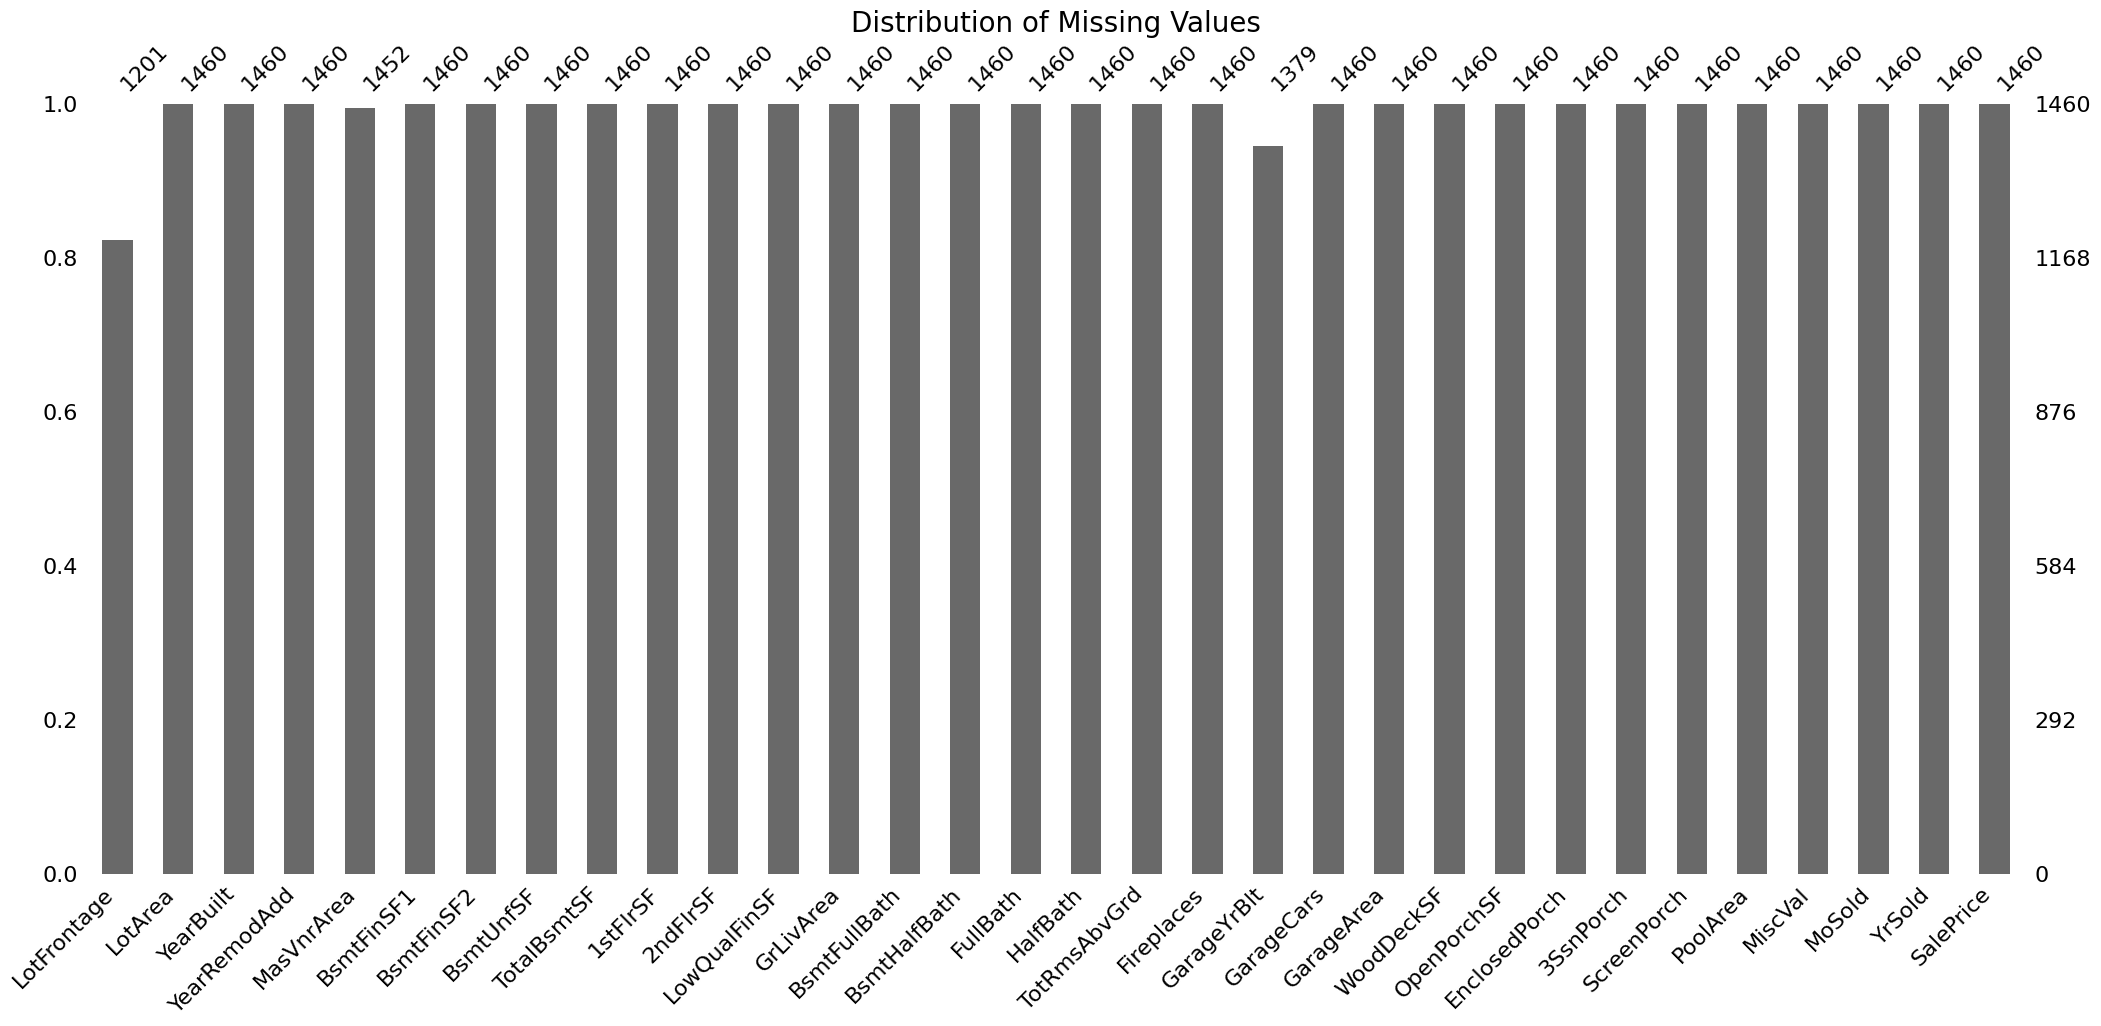

In [19]:
# check which columns have missing values
has_missing = numeric_attributes_df.isna().any()

# select the columns that have at least one missing value
cols_with_missing = numeric_attributes_df.columns[has_missing].tolist()

# print the columns with missing values
print("The following columns have missing values:")

[print(f"- {column}") for column in cols_with_missing]


msno.bar(numeric_attributes_df)
plt.title("Distribution of Missing Values", fontsize=20)


### Histogram of all numeric attributes


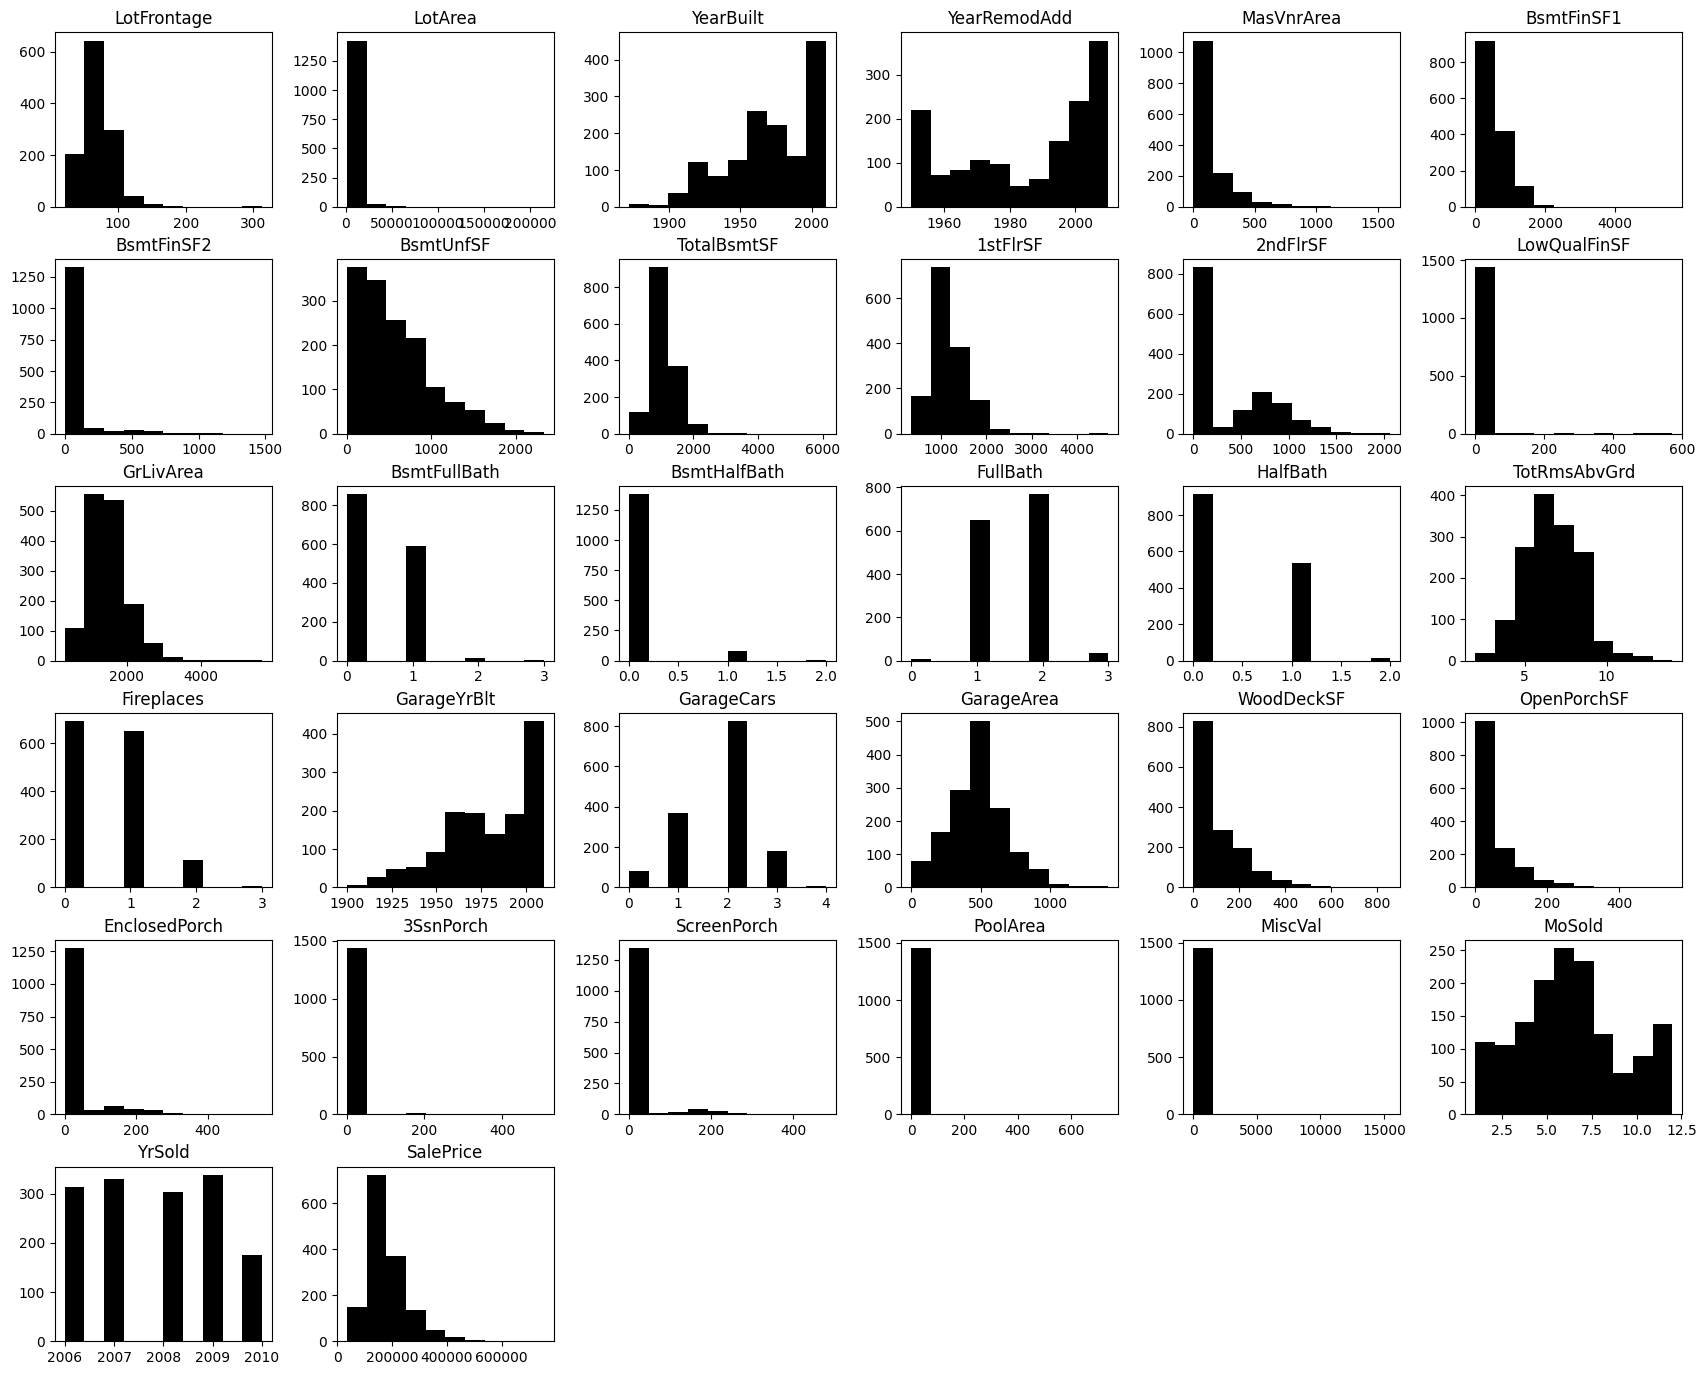

In [20]:
_ = numeric_attributes_df.hist(grid=False, figsize=(21, 17), color="black")


### YearBuilt: Original construction date

In [21]:
numeric_attribute = "YearBuilt"

# Create a figure
fig = go.Figure()

# Create subplots
fig = make_subplots(rows=1, cols=2, column_widths=[0.7, 0.3])

# Boxplot chart
fig.add_trace(boxplot_chart(numeric_attributes_df, numeric_attribute), row=1, col=1)

x_kde, y_kde = kde_values(df_train[numeric_attribute].values, 1850, 2030)
fig.add_trace(
    go.Scatter(
        x=x_kde, y=y_kde, mode="lines", showlegend=False, line=dict(color="black")
    ),
    row=1,
    col=2,
)


fig.update_layout(
    title="Distribution of the construction year of sold houses",
    yaxis_title="Year Built",
    plot_bgcolor="white",
)

fig.update_xaxes(title_text="Year Built", row=1, col=2)
fig.update_yaxes(title_text="Density", row=1, col=2)

fig.show()


### GrLivArea: Above grade (ground) living area square feet

In [22]:
liv_area = numeric_attributes_df["GrLivArea"].apply(lambda x: x / 10.764)

# Create subplots
fig = make_subplots(rows=1, cols=2, column_widths=[0.7, 0.3])

# Boxplot chart
fig.add_trace(
    go.Box(
        y=liv_area.values,
        boxmean=True,
        boxpoints="all",
        jitter=0.3,
        pointpos=-1.8,
        marker=dict(color="darkblue"),
        line=dict(color="black"),
        name=f"{numeric_attribute}",
        showlegend=False,
    ),
    row=1,
    col=1,
)

x_kde, y_kde = kde_values(liv_area.values, 0, 500)

fig.add_trace(
    go.Scatter(
        x=x_kde, y=y_kde, mode="lines", showlegend=False, line=dict(color="black")
    ),
    row=1,
    col=2,
)


fig.update_layout(
    title="Distribution of the above grade living area square of sold houses",
    yaxis_title="Living Area",
    plot_bgcolor="white",
)

fig.update_xaxes(title_text="Living Area", row=1, col=2)
fig.update_yaxes(title_text="Density", row=1, col=2)

fig.show()


### GarageCars: Size of garage in car capacity

In [23]:
garage_cars = numeric_attributes_df["GarageCars"].value_counts()

x = garage_cars.index.values
y = garage_cars.values

# Create Figure
fig = go.Figure()

# Bar plot
fig = go.Figure(go.Bar(x=x, y=y, marker_color="darkblue"))

fig.update_layout(
    title="Distribution of car parking capacity in sold houses",
    yaxis_title="Number of Houses Sold",
    xaxis_title="Cars capacity",
    plot_bgcolor="white",
)

fig.show()


### GarageArea: Size of garage in square feet

In [24]:

garage_area = numeric_attributes_df["GarageArea"].apply(lambda x: x / 10.764)

# Houses with garage
garage_area = garage_area[garage_area > 0]


# Create subplots
fig = make_subplots(rows=1, cols=2, column_widths=[0.7, 0.3])

# Boxplot chart
fig.add_trace(
    go.Box(
        y=garage_area.values,
        boxmean=True,
        boxpoints="all",
        jitter=0.3,
        pointpos=-1.8,
        marker=dict(color="darkblue"),
        line=dict(color="black"),
        name=f"{numeric_attribute}",
        showlegend=False,
    ),
    row=1,
    col=1,
)

x_kde, y_kde = kde_values(garage_area.values, 0, 100)
fig.add_trace(
    go.Scatter(
        x=x_kde, y=y_kde, mode="lines", showlegend=False, line=dict(color="black")
    ),
    row=1,
    col=2,
)


fig.update_layout(
    title="Distribution of the garage area of sold houses",
    yaxis_title="Garage Area [m^2]",
    plot_bgcolor="white",
)

fig.update_xaxes(title_text="Garage Area [m^2]", row=1, col=2)
fig.update_yaxes(title_text="Density", row=1, col=2)

fig.show()


### PoolArea: Pool area in square feet

In [25]:
pool_area = numeric_attributes_df["PoolArea"]

has_pool = (pool_area > 0).astype(int).rename("HasPool")

df_pool = pd.concat([has_pool, pool_area], axis=1)

df_pool["HasPool"].replace({0: "Doesn't have a pool", 1: "Has a pool"}, inplace=True)

df_pool["PoolArea"] = df_pool["PoolArea"].apply(lambda x: x / 10.764)


x = df_pool["HasPool"].value_counts()
fig = donut_chart(df_pool, "HasPool")

fig.update_layout(
    title={
        "text": "Houses with swimming pool according to the number of sales",
        "y": 0.95,
    },
)

fig.show()


In [26]:
numeric_attribute = "PoolArea"
houses_with_pool = df_pool.loc[df_pool["HasPool"] == "Has a pool"].copy()

# Create a figure
fig = go.Figure()

# Create subplots
fig = make_subplots(rows=1, cols=2, column_widths=[0.7, 0.3])

# Boxplot chart
fig.add_trace(boxplot_chart(houses_with_pool, numeric_attribute), row=1, col=1)

x_kde, y_kde = kde_values(houses_with_pool[numeric_attribute].values, 0, 100)
fig.add_trace(
    go.Scatter(
        x=x_kde, y=y_kde, mode="lines", showlegend=False, line=dict(color="black")
    ),
    row=1,
    col=2,
)


fig.update_layout(
    title="Distribution of the pool area of sold houses with pool",
    yaxis_title="Pool Area",
    plot_bgcolor="white",
)

fig.update_xaxes(title_text="Pool Area", row=1, col=2)
fig.update_yaxes(title_text="Density", row=1, col=2)

fig.show()


### YrSold: Year Sold

In [27]:
year_sold = numeric_attributes_df["YrSold"].value_counts()

x = year_sold.index.values
y = year_sold.values

# Create Figure
fig = go.Figure()

# Bar plot
fig = go.Figure(go.Bar(x=x, y=y, marker_color="darkblue"))

fig.update_layout(
    title="Yearly Sales of Houses",
    yaxis_title="Number of Houses Sold",
    xaxis_title="Year",
    plot_bgcolor="white",
)

fig.show()


### Sales Price

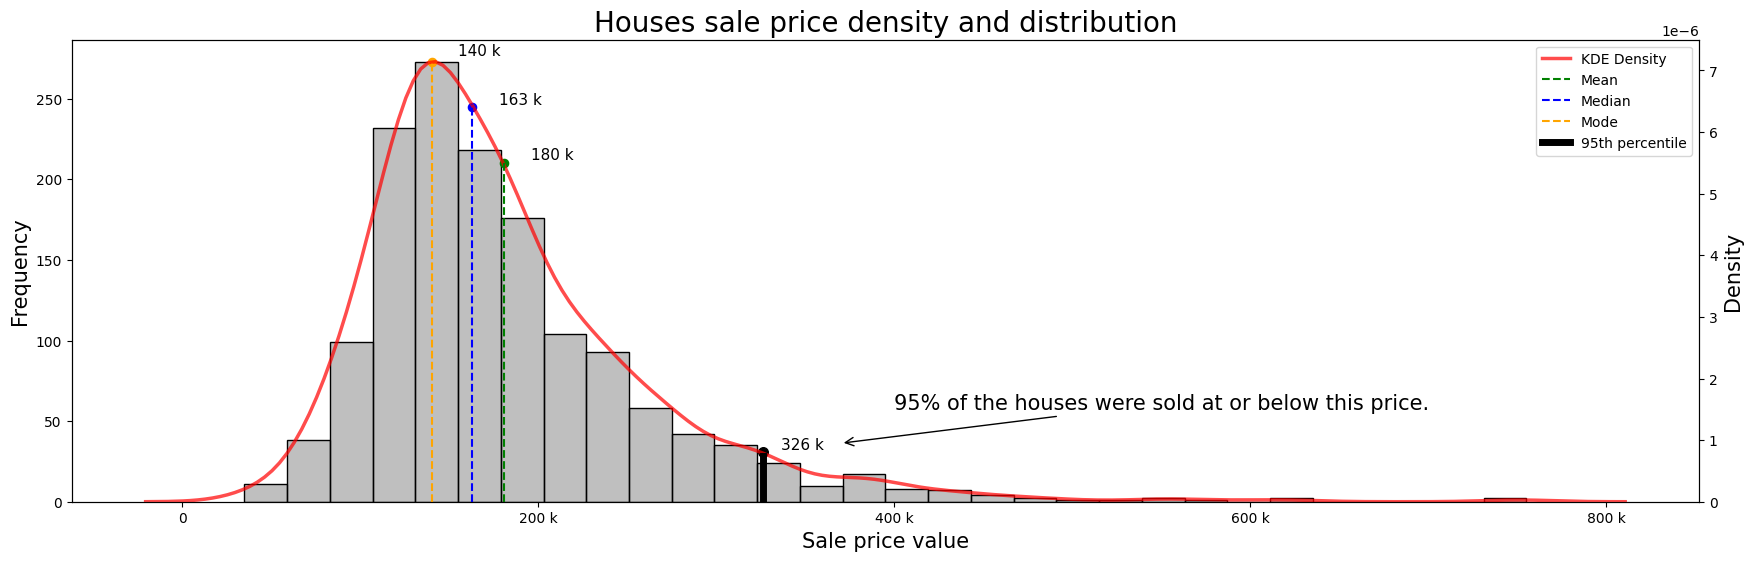

In [28]:
df = df_train.copy()

# Sale Price values
sale_price = df["SalePrice"].values


# Figure size
plt.figure(figsize=(21, 6))

# plt.hist(sale_price, bins=30, density=True, alpha=0.5, color="gray")
sns.histplot(sale_price, bins=30, alpha=0.5, color="gray")

# Change x and y label
plt.gca().set_xlabel("Sale price value", fontsize=15)
plt.gca().set_ylabel("Frequency", fontsize=15)

# Create a second y-axis for the KDE plot
ax2 = plt.gca().twinx()

kde = sns.kdeplot(
    sale_price,
    color="red",
    label="KDE Density",
    lw=2.5,
    ls="-",
    alpha=0.7,
)

# Adquirir os valores de KDE
line = kde.lines[0]
_, kde_values = line.get_data()

# Format x-axis in engineering notation
plt.gca().xaxis.set_major_formatter(ticker.EngFormatter())


# Add title and labels
plt.title("Houses sale price density and distribution", fontsize=20)


ax2.set_ylabel("Density", fontsize=15)


# Calculate mean, median and mode
mean = np.mean(sale_price)
median = np.median(sale_price)
mode = scipy.stats.mode(sale_price, keepdims=True)[0][0]

# Qual o valor de 95% das vendas?
q_sale_price = np.percentile(sale_price, 95)


# Traçar linhas verticais indicando a média, mediana, moda e percentile
plt.axvline(mean, ymax=0.74, color="green", linestyle="--", label="Mean")
plt.axvline(median, ymax=0.86, color="blue", linestyle="--", label="Median")
plt.axvline(mode, ymax=0.95, color="orange", linestyle="--", label="Mode")
plt.axvline(
    q_sale_price,
    ymax=0.10,
    color="black",
    linestyle="-",
    label="95th percentile",
    linewidth=5,
)

# Adicionar pontos e textos
plt.scatter(mean, 5.5e-6, color="green", s=35)
plt.scatter(median, 6.4e-6, color="blue", s=35)
plt.scatter(mode, np.max(kde_values), color="orange", s=35)
plt.scatter(q_sale_price, 0.80e-6, color="black", s=48)

mean_round = str(np.round(mean, 0))
median_round = str(np.round(median, 0))
mode_round = str(np.round(mode, 0))
q_sale_price_round = str(np.round(q_sale_price, 0))

plt.text(
    mean + 15e3, 5.5e-6, mean_round[:3] + " k", ha="left", va="bottom", fontsize=11
)
plt.text(
    median + 15e3, 6.4e-6, median_round[:3] + " k", ha="left", va="bottom", fontsize=11
)
plt.text(
    mode + 15e3, 7.20e-6, mode_round[:3] + " k", ha="left", va="bottom", fontsize=11
)
plt.text(
    q_sale_price + 10e3,
    0.8e-6,
    q_sale_price_round[:3] + " k",
    ha="left",
    va="bottom",
    fontsize=11,
)

plt.annotate(
    "95% of the houses were sold at or below this price.",
    xy=(370e3, 0.95e-6),
    xytext=(400e3, 1.5e-6),
    arrowprops=dict(facecolor="black", arrowstyle="->"),
    fontsize=15,
)


# Show legend
plt.legend()

# Show graph
plt.show()

# Multivariate analysis

## Sale Price Analysis

<Axes: title={'center': 'Correlation between numerical attributes and the sale price of a house'}>

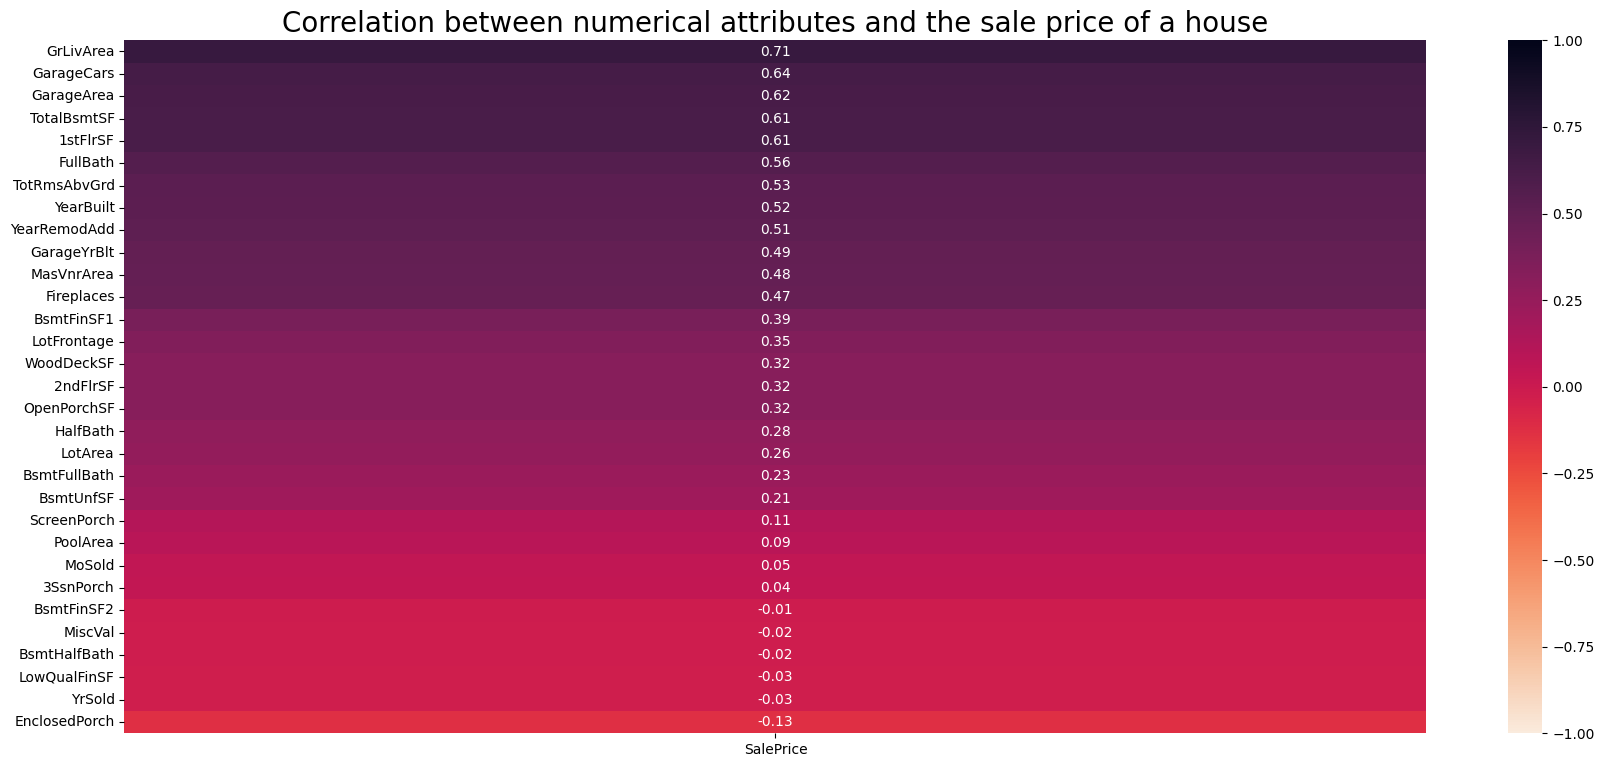

In [29]:
correlation = numeric_attributes_df.corr()

correlation = correlation.round(2)

correlation = correlation["SalePrice"]

correlation.drop("SalePrice", inplace=True)

correlation.sort_values(ascending=False, inplace=True)


plt.figure(figsize=(21, 9))
plt.title(
    "Correlation between numerical attributes and the sale price of a house",
    fontsize=20,
)
#sns.set(font_scale=1)

sns.heatmap(pd.DataFrame(correlation), annot=True, cmap="rocket_r", vmin=-1, vmax=1)



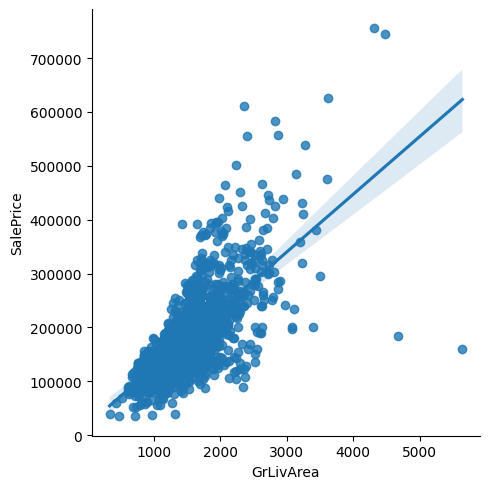

In [30]:
sns.lmplot(data=numeric_attributes_df, x="GrLivArea", y="SalePrice")

# 3. Classification Analysis

In [31]:
# carregando os datos de treinamento e validação 
train = df_train.copy()
test = df_test.copy()

## 3.1 Data treatment and cleaning

### 3.1.1 Train Data

#### 3.1.1.1 Missing data treatment

In [32]:
# Calcular a porcentagem de valores ausentes em cada coluna com valores ausentes maiores que 0
missing_data = train.isnull().sum()[train.isnull().sum() > 0]
missing_data_percentage = missing_data / len(train) * 100

# Combinar as informações em um dataframe
missing_data_df = pd.concat(
    [missing_data, missing_data_percentage], axis=1, keys=["Total", "Percentage"]
)

# Ordenar os valores pela porcentagem de valores ausentes em ordem decrescente
missing_data_df = missing_data_df.sort_values(by="Percentage", ascending=False)

missing_data_df

,Total,Percentage
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
MasVnrType,872,59.726027
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


In [33]:
# Lista de colunas que precisam ser preenchidas com "NA"
cols_to_fillna = [
    "PoolQC",
    "MiscFeature",
    "Alley",
    "Fence",
    "FireplaceQu",
    "GarageType",
    "GarageFinish",
    "GarageQual",
    "GarageCond",
    "BsmtExposure",
    "BsmtFinType2",
    "BsmtFinType1",
    "BsmtCond",
    "BsmtQual",
]

# Usando uma compreensão de lista para preencher os valores ausentes com "NA" em cada coluna
for col in cols_to_fillna:
    train[col].fillna("NA", inplace=True)

# Preenchendo os valores ausentes no atributo "LotFrontage" com o valor padrão "0"
train["LotFrontage"].fillna(0, inplace=True)

# Preenchendo os valores ausentes no atributo "GarageYrBlt" com o valor padrão "0"
train["GarageYrBlt"].fillna(0, inplace=True)

# Excluindo as instâncias com valores ausentes (conjunto pequeno em relação ao tamanho do conjunto de dados)
cols_to_dropna = ["MasVnrType", "MasVnrArea", "Electrical"]
train.dropna(subset=cols_to_dropna, inplace=True)

#### 3.1.1.2 Remove irrelavent atributes

In [34]:
test.drop(
    columns=["Id"], inplace=True
)

#### 3.1.1.3 Encode categorical variables

In [35]:
# Chamando a função encode_categorical() para aplicar LabelEncoder em variáveis categóricas
train = encode_categorical(train)

### 3.1.2 Test Data

#### 3.1.2.1 Missing Data Treatment

In [36]:
# Calcular a porcentagem de valores ausentes em cada coluna com valores ausentes maiores que 0
missing_data = test.isnull().sum()[test.isnull().sum() > 0]
missing_data_percentage = missing_data / len(test) * 100

# Combinar as informações em um dataframe
missing_data_df = pd.concat(
    [missing_data, missing_data_percentage], axis=1, keys=["Total", "Percentage"]
)

# Ordenar os valores pela porcentagem de valores ausentes em ordem decrescente
missing_data_df = missing_data_df.sort_values(by="Percentage", ascending=False)

missing_data_df

,Total,Percentage
PoolQC,1456,99.794380
MiscFeature,1408,96.504455
Alley,1352,92.666210
Fence,1169,80.123372
MasVnrType,894,61.274846
FireplaceQu,730,50.034270
LotFrontage,227,15.558602
GarageCond,78,5.346127
GarageYrBlt,78,5.346127
GarageQual,78,5.346127


In [37]:
# Lista de colunas que precisam ser preenchidas com "NA"
cols_to_fillna = [
    "PoolQC",
    "MiscFeature",
    "Alley",
    "Fence",
    "FireplaceQu",
    "GarageType",
    "GarageFinish",
    "GarageQual",
    "GarageCond",
    "BsmtExposure",
    "BsmtFinType2",
    "BsmtFinType1",
    "BsmtCond",
    "BsmtQual",
]

# Usando uma compreensão de lista para preencher os valores ausentes com "NA" em cada coluna
for col in cols_to_fillna:
    test[col].fillna("NA", inplace=True)

test["MasVnrType"].fillna("None", inplace=True)

# Preenchendo os valores ausentes no atributo "LotFrontage" com o valor padrão "0"
test["LotFrontage"].fillna(0, inplace=True)

# Preenchendo os valores ausentes no atributo "GarageYrBlt" com o valor padrão "0"
test["GarageYrBlt"].fillna(0, inplace=True)

# Preenchendo os valores ausentes no atributo "MasVnrArea" com o valor padrão "0"
test["MasVnrArea"].fillna(0, inplace=True)

# Excluindo as instâncias com valores ausentes (conjunto pequeno em relação ao tamanho do conjunto de dados)
cols_to_dropna = [
    "MSZoning",
    "BsmtFullBath",
    "BsmtHalfBath",
    "Functional",
    "Utilities",
    "GarageCars",
    "GarageArea",
    "TotalBsmtSF",
    "KitchenQual",
    "BsmtUnfSF",
    "BsmtFinSF2",
    "BsmtFinSF1",
    "Exterior2nd",
    "Exterior1st",
]
test.dropna(subset=cols_to_dropna, inplace=True)

#### 3.1.2.2 Remove irrelavent atributes

In [38]:
train.drop(
    columns=["Id"], inplace=True
)

#### 3.1.2.3 Encode categorical variables

In [39]:
# Chamando a função encode_categorical() para aplicar LabelEncoder em variáveis categóricas
test = encode_categorical(test)

## 3.3 Discretizer Sale Price

In [40]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import MinMaxScaler

target_variable = "SalePrice"

# Ajustar e transformar os dados de treinamento e teste com MinMaxScaler
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train[[target_variable]])
test_scaled = scaler.transform(test[[target_variable]])

# Instanciar a classe KBinsDiscretizer com 5 bins (faixas)
discretizer = KBinsDiscretizer(n_bins=5, encode="ordinal", strategy="quantile")

# Aplicar o discretizer nos dados 'SalePrice' escalonados
train_preco_discretizado = discretizer.fit_transform(train_scaled)
test_preco_discretizado = discretizer.transform(test_scaled)

# Adicionar a nova coluna de categorias ao dataframe original
train["SalePriceCategorical"] = pd.Series(train_preco_discretizado.reshape(-1))
test["SalePriceCategorical"] = pd.Series(test_preco_discretizado.reshape(-1))

target_variable = "SalePriceCategorical"

# Renomear as categorias
train[target_variable].replace(
    {
        0: "House Price 1",
        1: "House Price 2",
        2: "House Price 3",
        3: "House Price 4",
        4: "House Price 5",
    },
    inplace=True,
)
test[target_variable].replace(
    {
        0: "House Price 1",
        1: "House Price 2",
        2: "House Price 3",
        3: "House Price 4",
        4: "House Price 5",
    },
    inplace=True,
)

train.dropna(inplace=True)
test.dropna(inplace=True)

## 3.4 Standard Data

In [41]:
from sklearn.preprocessing import StandardScaler

# Padronizar as entradas do modelo
# Criar um objeto StandardScaler
scaler = StandardScaler()

# retirar a coluna SalePrice
train.drop(columns="SalePrice", inplace=True)
test.drop(columns="SalePrice", inplace=True)

# Padronizar todo o dataframe
X_train = scaler.fit_transform(train.drop(target_variable, axis=1))
X_test = scaler.fit_transform(test.drop(target_variable, axis=1))

In [42]:
# Separar as variáveis de entrada (features) e o target
y_train = train[target_variable]
y_test = test[target_variable]

## 3.2 C4.5 Decision Tree classifier

In [43]:
from sklearn.tree import DecisionTreeClassifier

# Instanciar o classificador DecisionTreeClassifier com os parâmetros padrão
classifier = DecisionTreeClassifier(criterion="entropy")

# Treinar o classificador com os dados de treinamento
classifier.fit(X_train, y_train)

# Realizar as predições com os dados de teste
y_pred = classifier.predict(X_test)

# Avaliar a precisão do modelo
accuracy = classifier.score(X_test, y_test)
print("A precisão do modelo é: {:.2f}%".format(accuracy * 100))

A precisão do modelo é: 25.54%


In [44]:
# Questão 1)
import graphviz
from sklearn import tree

feature_names = train.drop(columns=target_variable).columns
class_names = train[target_variable].unique()

# Criar uma representação em DOT da árvore de decisão
dot_data = tree.export_graphviz(
    classifier,
    out_file=None,
    feature_names=feature_names,
    class_names=class_names, 
    filled=True,
    rounded=True,
    special_characters=True,
)

# Renderizar a árvore de decisão usando o Graphviz
graph = graphviz.Source(dot_data)
graph.render(
    "decision_tree", format="png", cleanup=True
)  # Salva a árvore de decisão como uma imagem PNG
graph.view()  # Abre a imagem da árvore de decisão gerada

'decision_tree.pdf'

In [46]:
# Questão 3)
from sklearn.model_selection import cross_val_score

# Definir o número de folds para a validação cruzada
cv_folds = 10

# Calcular a taxa de acerto usando validação cruzada com 10 folds
scores = cross_val_score(classifier, X_test, y_test, cv=cv_folds, scoring='accuracy')

# Calcular a média das taxas de acerto de cada fold
average_accuracy = scores.mean()

# Imprimir a taxa média de acerto
print("A taxa média de acerto utilizando o método de validação cruzada com {} folds é: {:.2f}%".format(cv_folds, average_accuracy * 100))


A taxa média de acerto utilizando o método de validação cruzada com 10 folds é: 49.96%


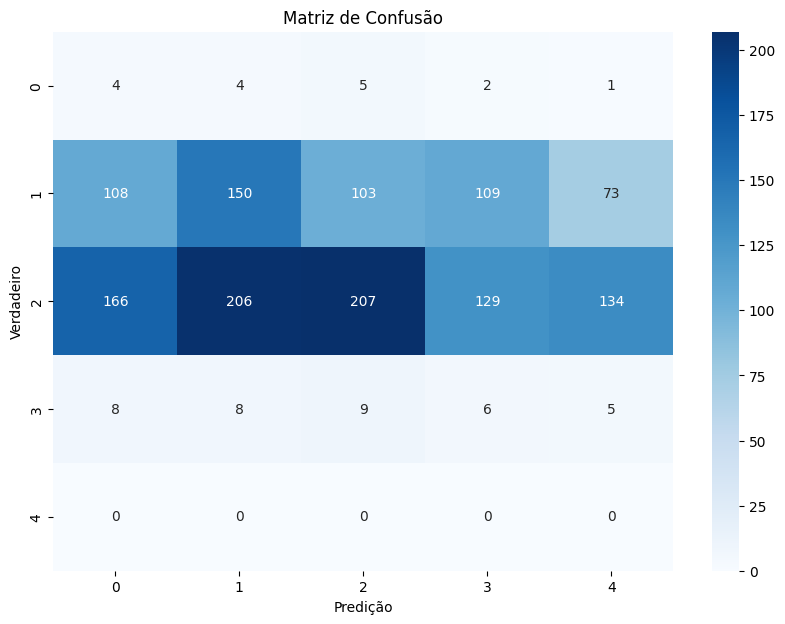

In [48]:
# Questao 4) 

from sklearn.metrics import confusion_matrix

# Calcular a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Criar um gráfico de heatmap com a matriz de confusão
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predição')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

# 3.3 REPtree (Reduced Error Pruning Tree)

In [ ]:
import weka.core.jvm as jvm
from weka.core.converters import Loader
from weka.classifiers import Classifier, Evaluation
from weka.core.classes import Random

# Iniciar a JVM
jvm.start()

# Carregar o conjunto de dados
loader = Loader("weka.core.converters.ArffLoader")
data = loader.load_file("your_dataset.arff")  # Substitua pelo caminho do seu arquivo ARFF

# Definir o índice da classe
data.class_index = data.num_attributes - 1  # Substitua pelo índice correto da classe

# Instanciar o classificador REPtree
reptree = Classifier(classname="weka.classifiers.trees.REPTree")

# Avaliar o classificador REPtree usando validação cruzada de 10 folds
evaluation = Evaluation(data)
evaluation.crossvalidate_model(reptree, data, 10, Random(1))

# Imprimir a árvore gerada
reptree.build_classifier(data)
print("Árvore de decisão gerada pelo algoritmo REPtree:")
print(reptree)

# Parar a JVM
jvm.stop()


# TODO
 - Realizar ajustes nos atributos inseridos no modelo (momentaneamente estou inserindo todos os atributos, apenas para testar codigo, é necessário realizar um trabalho de feature seleaction. Podemos até fazer com o algoritmo RelieF por exemplo, para diminuir a dimensionalidade)

# OBS
 - Como é um problema de regressão e não de classificação, é necessário discretizar a variável dependente, no caso 'SalePrice'
